In [109]:
import numpy as np
import math
import astropy
import matplotlib.pyplot as plt
from astropy.table import Table
from matplotlib import colormaps
import matplotlib.colors
from scipy.interpolate import interp1d


In [110]:
data_hetvips_gaia = Table.read("hetvips_gaia.fits")
Teff_hetvips_gaia = data_hetvips_gaia['Teff']
logg_hetvips_gaia = data_hetvips_gaia['logg']
FeH_hetvips_gaia = data_hetvips_gaia['[Fe/H]']

data_hetvips_apogee = Table.read("hetvips_apogee.fits")
Teff_hetvips_apogee = data_hetvips_apogee['TEFF']
logg_hetvips_apogee = data_hetvips_apogee['LOGG']
FeH_hetvips_apogee = data_hetvips_apogee['FE_H']

data_hetvips_lamost = Table.read("hetvips_lamost.fits")
Teff_hetvips_lamost = data_hetvips_lamost['TEFF']
logg_hetvips_lamost = data_hetvips_lamost['LOGG']
FeH_hetvips_lamost = data_hetvips_lamost['FEH']

In [111]:
print("in all of the HETVIPS/Gaia Dataset:")
print("min [Fe/H]:")
print(min(data_hetvips_gaia['[Fe/H]']))
print("max [Fe/H]:")
print(max(data_hetvips_gaia['[Fe/H]']))
print("min logg:")
print(min(data_hetvips_gaia['logg']))
print("max logg:")
print(max(data_hetvips_gaia['logg']))
print("min Teff:")
print(min(data_hetvips_gaia['Teff']))
print("max Teff:")
print(max(data_hetvips_gaia['Teff']))

in all of the HETVIPS/Gaia Dataset:
min [Fe/H]:
-4.1408
max [Fe/H]:
0.7976
min logg:
0.217
max logg:
5.2418
min Teff:
2732.2
max Teff:
34999.4


In [112]:
print(matplotlib.scale.get_scale_names())

['asinh', 'function', 'functionlog', 'linear', 'log', 'logit', 'symlog']


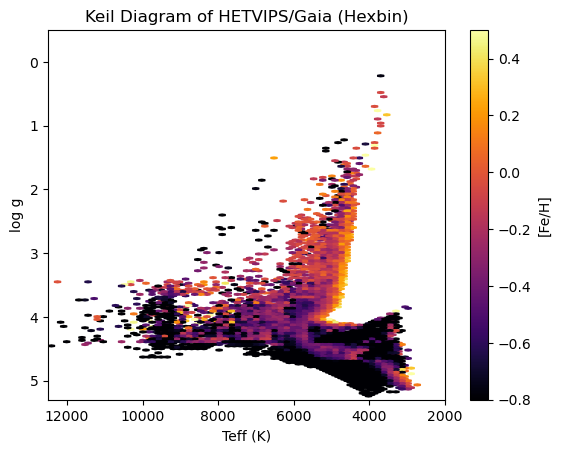

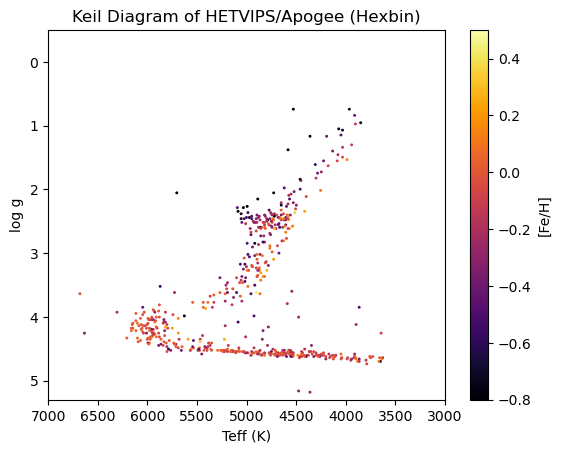

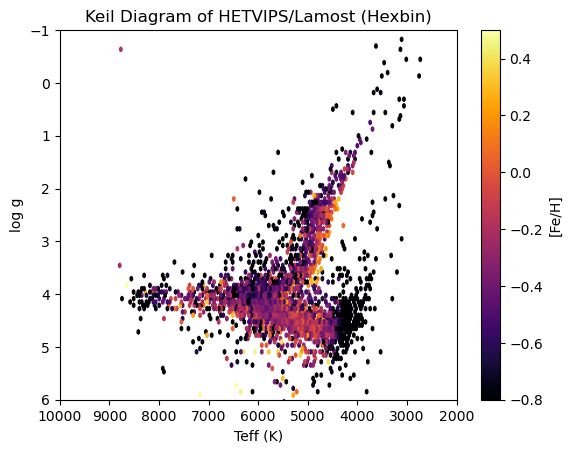

In [113]:


import matplotlib.colors

plt.figure()
cmap = plt.cm.inferno
hb1 = plt.hexbin(Teff_hetvips_gaia,logg_hetvips_gaia, C=FeH_hetvips_gaia, gridsize=(200), cmap=cmap, vmin=-.8, vmax=.5)
plt.title("Keil Diagram of HETVIPS/Gaia (Hexbin)")
plt.xlabel("Teff (K)")
plt.ylabel("log g")
plt.colorbar(hb1, label="[Fe/H]")
ax = plt.gca()
ax.set_xlim([2000, 12500])
ax.set_ylim([-.5, 5.3])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.savefig(fname="keil_hetvips_gaia_hexbin(1).png")

plt.figure()
cmap = plt.cm.inferno
hb2 = plt.hexbin(Teff_hetvips_apogee,logg_hetvips_apogee, C=FeH_hetvips_apogee, gridsize=(200), cmap=cmap, vmin=-.8, vmax=.5)
plt.title("Keil Diagram of HETVIPS/Apogee (Hexbin)")
plt.xlabel("Teff (K)")
plt.ylabel("log g")
plt.colorbar(hb2, label="[Fe/H]")
ax = plt.gca()
ax.set_xlim([3000, 7000])
ax.set_ylim([-.5, 5.3])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.savefig(fname="keil_hetvips_apogee_hexbin(1).png")

plt.figure()
cmap = plt.cm.inferno
hb3 = plt.hexbin(Teff_hetvips_lamost,logg_hetvips_lamost, C=FeH_hetvips_lamost, gridsize=(400,8000), cmap=cmap, vmin=-.8, vmax=.5)
plt.title("Keil Diagram of HETVIPS/Lamost (Hexbin)")
plt.xlabel("Teff (K)")
plt.ylabel("log g")
plt.colorbar(hb3, label="[Fe/H]")
ax = plt.gca()
ax.set_xlim([2000, 10000])
ax.set_ylim([-1, 6])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.savefig(fname="keil_hetvips_lamost_hexbin(1).png")

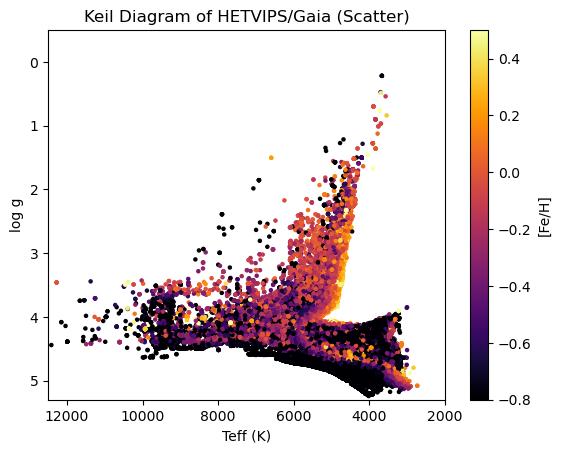

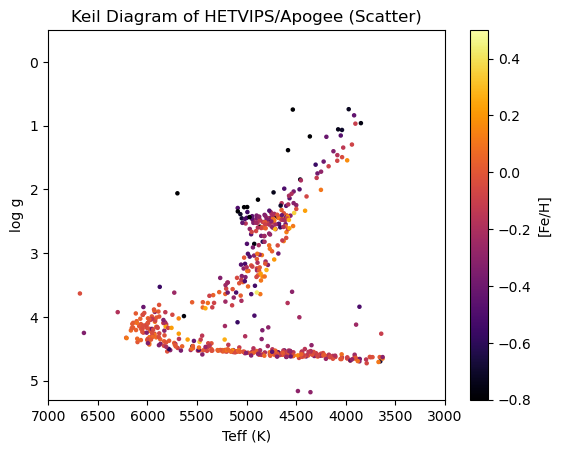

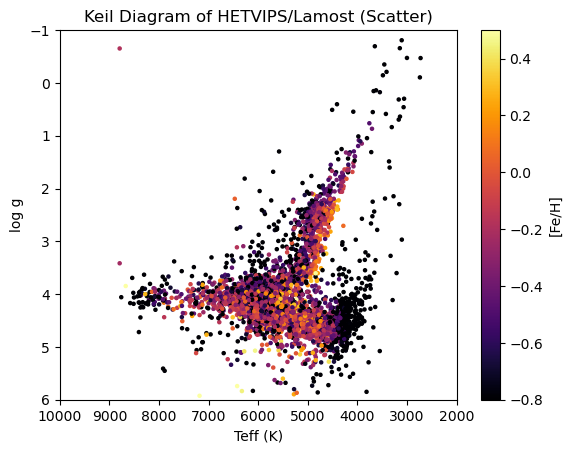

In [114]:
plt.figure()
cmap = plt.cm.inferno
plot = plt.scatter(Teff_hetvips_gaia,logg_hetvips_gaia, s=5, c=data_hetvips_gaia['[Fe/H]'],cmap=cmap, vmin=-.8, vmax=.5)
plt.title("Keil Diagram of HETVIPS/Gaia (Scatter)")
plt.xlabel("Teff (K)")
plt.ylabel("log g")
plt.colorbar(plot, label="[Fe/H]")
ax = plt.gca()
ax.set_xlim([2000, 12500])
ax.set_ylim([-.5, 5.3])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.savefig(fname="keil_hetvips_gaia(1).png")

plt.figure()
cmap = plt.cm.inferno
plot = plt.scatter(Teff_hetvips_apogee,logg_hetvips_apogee, s=5, c=data_hetvips_apogee['FE_H'],cmap=cmap, vmin=-.8, vmax=.5)
plt.title("Keil Diagram of HETVIPS/Apogee (Scatter)")
plt.xlabel("Teff (K)")
plt.ylabel("log g")
plt.colorbar(plot, label="[Fe/H]")
ax = plt.gca()
ax.set_xlim([3000, 7000])
ax.set_ylim([-.5, 5.3])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.savefig(fname="keil_hetvips_apogee(1).png")


plt.figure()
cmap = plt.cm.inferno
plot = plt.scatter(Teff_hetvips_lamost,logg_hetvips_lamost, s=5, c=data_hetvips_lamost['FEH'],cmap=cmap, vmin=-.8, vmax=.5)
plt.title("Keil Diagram of HETVIPS/Lamost (Scatter)")
plt.xlabel("Teff (K)")
plt.ylabel("log g")
plt.colorbar(plot, label="[Fe/H]")
ax = plt.gca()
ax.set_xlim([2000, 10000])
ax.set_ylim([-1, 6])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.savefig(fname="keil_hetvips_lamost(1).png")


In [115]:
print((data_hetvips_gaia["[Fe/H]"])[0:7])
print(len(data_hetvips_gaia["[Fe/H]"]))

 [Fe/H]
  dex  
-------
-0.7656
     --
     --
     --
 0.0712
-0.2261
     --
378630


In [116]:
print(data_hetvips_lamost[:0])

objID  RA Dec shotid gmag rmag ... ecl_lon ecl_lat dist Separation_2 Separation
                               ...   deg     deg           arcsec      arcsec  
----- --- --- ------ ---- ---- ... ------- ------- ---- ------------ ----------


In [117]:
print("in all of the HETVIPS/Lamost Dataset:")
print("min logg:")
print(min(data_hetvips_lamost['LOGG']))
print("max logg:")
print(max(data_hetvips_lamost['LOGG']))
print("min Teff:")
print(min(data_hetvips_lamost['TEFF']))
print("max Teff:")
print(max(data_hetvips_lamost['TEFF']))

print("min SNR_U:")
print(min(data_hetvips_lamost['SNR_U']))
print("max SNR_U:")
print(max(data_hetvips_lamost['SNR_U']))
print("min SNR_G:")
print(min(data_hetvips_lamost['SNR_G']))
print("max SNR_G:")
print(max(data_hetvips_lamost['SNR_G']))
print("min SNR_R:")
print(min(data_hetvips_lamost['SNR_R']))
print("max SNR_R:")
print(max(data_hetvips_lamost['SNR_R']))
print("min SNR_I:")
print(min(data_hetvips_lamost['SNR_I']))
print("max SNR_I:")
print(max(data_hetvips_lamost['SNR_I']))
print("min SNR_Z:")
print(min(data_hetvips_lamost['SNR_Z']))
print("max SNR_Z:")
print(max(data_hetvips_lamost['SNR_Z']))

in all of the HETVIPS/Lamost Dataset:
min logg:
-999.0
max logg:
8.240515
min Teff:
-9999.0
max Teff:
8792.6
min SNR_U:
0.0
max SNR_U:
153.48
min SNR_G:
0.0
max SNR_G:
511.44
min SNR_R:
0.0
max SNR_R:
647.18
min SNR_I:
0.0
max SNR_I:
786.41
min SNR_Z:
0.0
max SNR_Z:
754.28


In [118]:

lamost_flag_mask =  np.where((data_hetvips_lamost["LOGG"] > 1) & (data_hetvips_lamost["LOGG"] < 5) & (data_hetvips_lamost["TEFF"] < 25000) & (data_hetvips_lamost["SNR_G"] > 5) & (data_hetvips_lamost["RV_ERR"] < 10) & (data_hetvips_lamost["FEH_ERR"] < .2) & (abs(data_hetvips_lamost["RV"]) < 600))
fixed_hetvips_lamost = data_hetvips_lamost[lamost_flag_mask]

print(len(fixed_hetvips_lamost))

#there is an issue with the SNRs

New_Teff_hetvips_lamost = fixed_hetvips_lamost['TEFF']
New_logg_hetvips_lamost = fixed_hetvips_lamost['LOGG']
New_FeH_hetvips_lamost = fixed_hetvips_lamost['FEH']

print("in all of the HETVIPS/Lamost Dataset:")
print("min logg:")
print(min(fixed_hetvips_lamost['LOGG']))
print("max logg:")
print(max(fixed_hetvips_lamost['LOGG']))
print("min Teff:")
print(min(fixed_hetvips_lamost['TEFF']))
print("max Teff:")
print(max(fixed_hetvips_lamost['TEFF']))

print(len(fixed_hetvips_lamost))

#& (data_hetvips_lamost["CHI2RATIO"] < 10)

#print("in all of the HETVIPS/Lamost Dataset:")
#print("min logg:")
#print(min(New_logg_hetvips_lamost))
#print("max logg:")
#print(max(New_logg_hetvips_lamost))
#print("min Teff:")
#print(min(New_Teff_hetvips_lamost))
#print("max Teff:")
#print(max(New_Teff_hetvips_lamost))

3351
in all of the HETVIPS/Lamost Dataset:
min logg:
1.0129092
max logg:
4.991424
min Teff:
3600.609
max Teff:
8760.441
3351


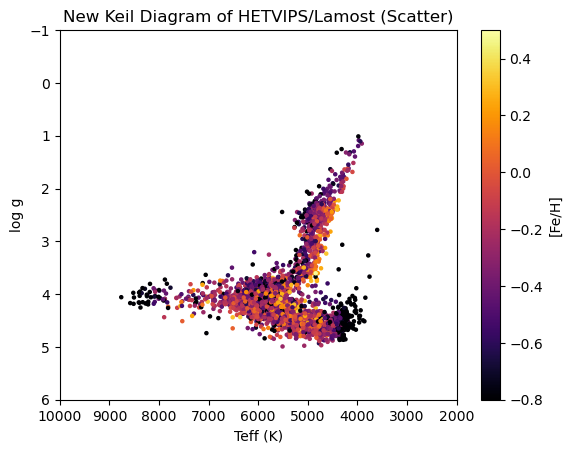

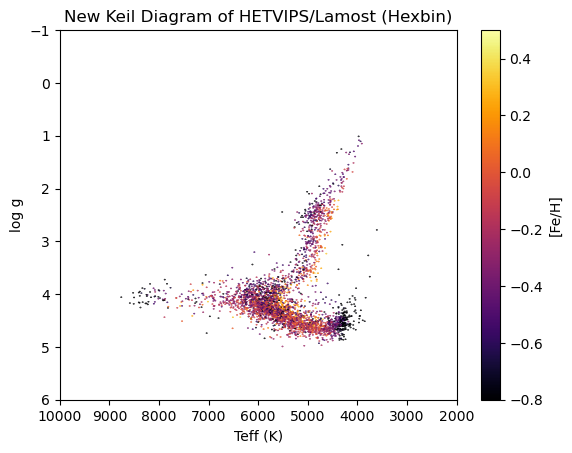

In [119]:
plt.figure()
cmap = plt.cm.inferno
plot = plt.scatter(New_Teff_hetvips_lamost,New_logg_hetvips_lamost, s=5, c=fixed_hetvips_lamost['FEH'],cmap=cmap, vmin=-.8, vmax=.5)
plt.title("New Keil Diagram of HETVIPS/Lamost (Scatter)")
plt.xlabel("Teff (K)")
plt.ylabel("log g")
plt.colorbar(plot, label="[Fe/H]")
ax = plt.gca()
ax.set_xlim([2000, 10000])
ax.set_ylim([-1, 6])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.savefig(fname="New_keil_hetvips_lamost(1).png")

plt.figure()
cmap = plt.cm.inferno
hb4 = plt.hexbin(New_Teff_hetvips_lamost,New_logg_hetvips_lamost, C=New_FeH_hetvips_lamost, gridsize=(400,8000), cmap=cmap, vmin=-.8, vmax=.5)
plt.title("New Keil Diagram of HETVIPS/Lamost (Hexbin)")
plt.xlabel("Teff (K)")
plt.ylabel("log g")
plt.colorbar(hb4, label="[Fe/H]")
ax = plt.gca()
ax.set_xlim([2000, 10000])
ax.set_ylim([-1, 6])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.savefig(fname="New_keil_hetvips_lamost_hexbin(1).png")


873
flux length = 873
wavelength shape = 873
1011
flux length = 1011
wavelength shape = 1011
926
flux length = 926
wavelength shape = 926
987
flux length = 987
wavelength shape = 987
1008
flux length = 1008
wavelength shape = 1008


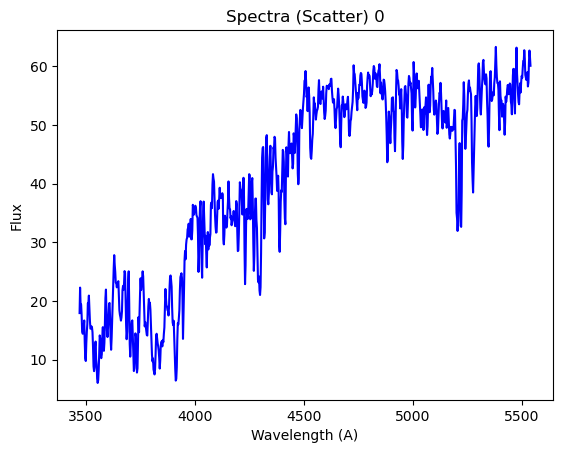

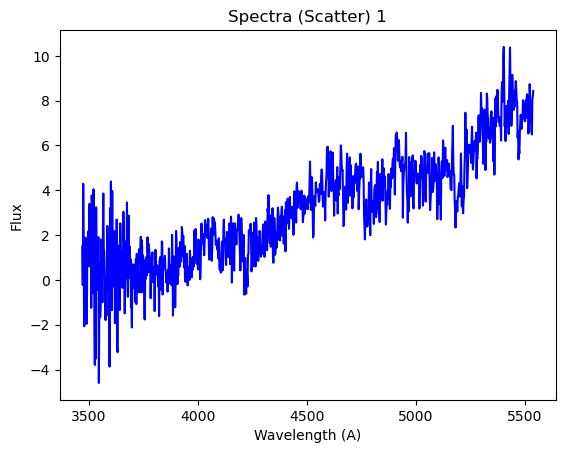

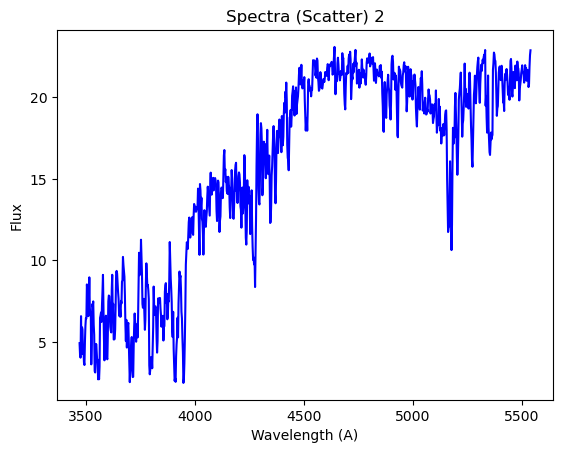

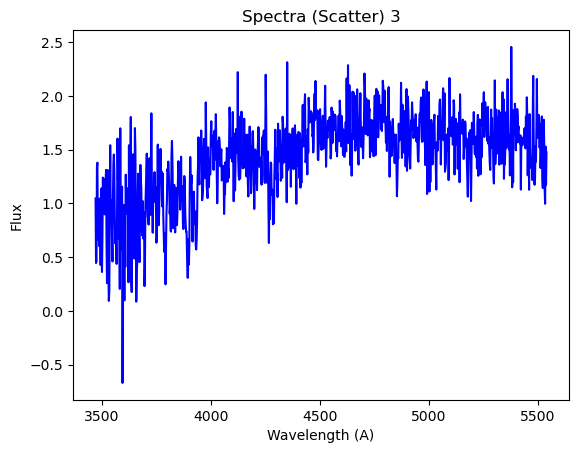

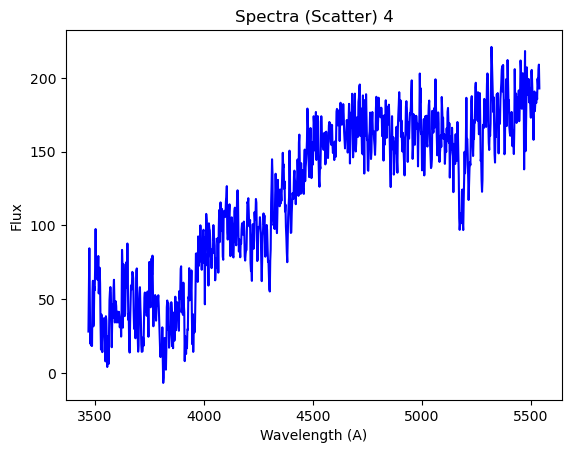

In [130]:
spectra_data = Table.read("hetvips_lamost_spectras.fits")
n=0

spectra = spectra_data['spec'][n]

for n in range(5):
    spectra = spectra_data['spec'][n]
    spectra = spectra[~np.isnan(spectra)]
    print(len(spectra))
    flux_length = len(spectra)
    print("flux length = " + str(flux_length))
    wavelength_shape = np.linspace(3470,5540,flux_length)
    print("wavelength shape = " + str(len(wavelength_shape)))
    plt.figure()
    plot = plt.plot(wavelength_shape,[spectra][0], color="blue")
    plt.title("Spectra (Scatter) " + str(n))
    plt.xlabel("Wavelength (A)")
    plt.ylabel("Flux")  

#interpolate, spline, gives dotted line, then just sample that little grid
    #ivar tells cannon that the error is big where we interpolated it so it doesnt trust it
    #1 replace nans then continuum normalize to 1
    #2 Boosted mean continuum
#need to normalize it, reading papers to see what to dooooo

[17.941607750253425, 21.602969673158974, 20.18840398182866, 19.321037026816885, 18.724880245054685, 16.955562645274913, 14.696825594424178, 14.453345317878739, 14.487190527192164, 15.176258848935667, 16.0906422684349, 15.681492078382398, 12.649046210523393, 10.37803785731354, 9.870542029180113, 17.941607750253425, 22.287375628931485, 19.223291489648744, 19.40857835955539, 17.56098684908992, 14.712741162959821, 14.423747944812423, 14.509469971918215, 15.653958342918424, 16.681158031349376, 12.945944091562106, 10.250423855814153, 9.772686686231806, 12.77234925839356, 14.751228857030968, 16.071805034831304, 11.787104083375779, 8.984755482101422, 8.19909109683962, 8.422619221174077, 10.42817635389929, 12.567562016129118, 19.645739076269674, 19.621786206522156, 20.92600382776169, 18.615179115659213, 16.640943655114896, 15.27250989892518, 15.305001964035457, 15.67998612803394, 15.489988141360076, 14.701362455348475, 12.179175791352266, 8.852993678601143, 8.038566275324152, 8.633618369567683,

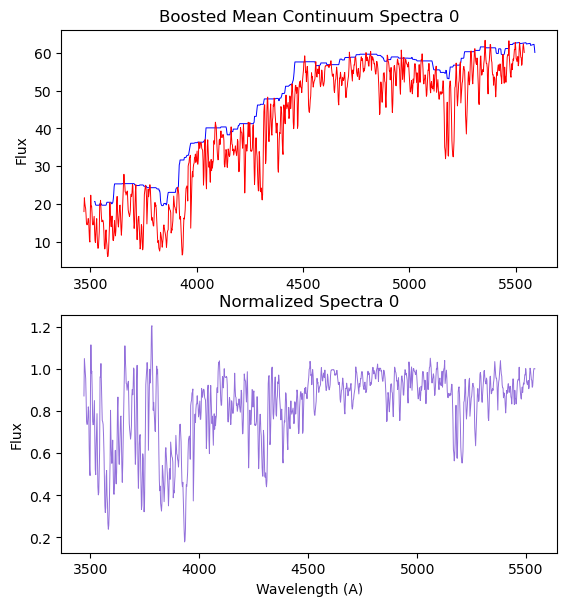

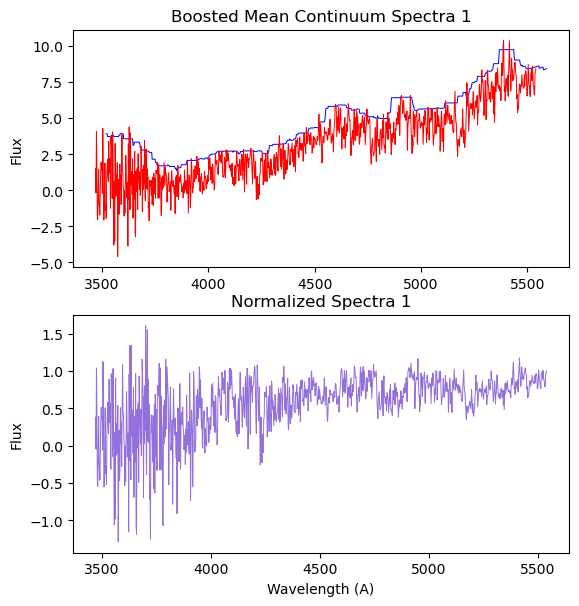

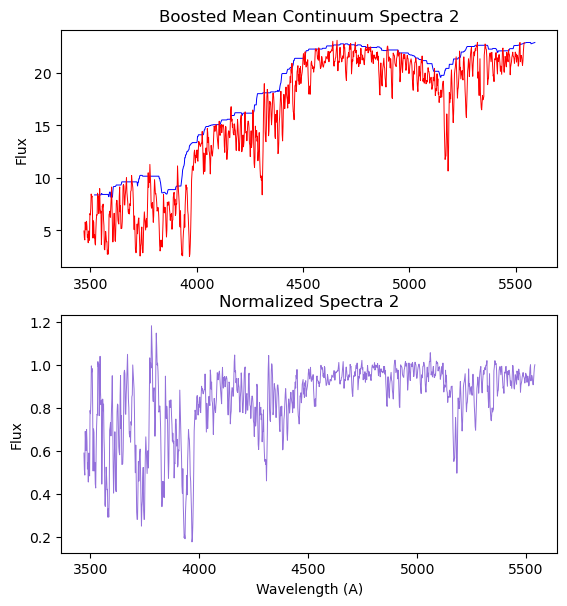

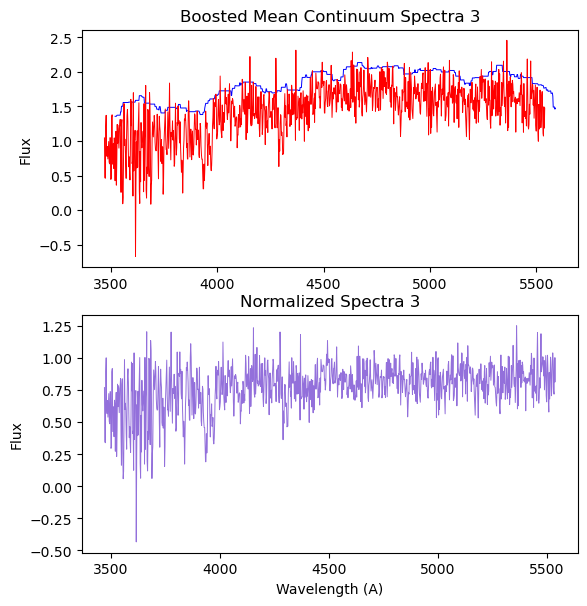

In [229]:
spectra_data = Table.read("hetvips_lamost_spectras.fits")
n=0

for n in range(4):
    spectra = np.array(spectra_data['spec'][n])
    #print(len(spectra))
    no_nan_spectra = spectra[~np.isnan(spectra)]
    #print(len(no_nan_spectra))
    #print(("spectra Length: ")+str(len(spectra)))
    flux_length = len(spectra)
    no_nan_flux_length = len(no_nan_spectra)
    #print("flux length = " + str(flux_length))
    #print("no nan flux length = " + str(no_nan_flux_length))
    wavelength_shape = np.linspace(3470,5540,flux_length)
    no_nan_wavelength_shape = np.linspace(3470,5540,no_nan_flux_length)
    #print("wavelength shape = " + str(len(wavelength_shape)))
    #print("no nan wavelength shape = " + str(len(no_nan_wavelength_shape)))

    new_interpolated_spectra = []
    for i in range(len(spectra)):
        check = np.isnan(spectra[i])
        if check == False:
            new_interpolated_spectra.append(spectra[i])
        if check == True:
            x = wavelength_shape[i]
            xp = no_nan_wavelength_shape
            fp = no_nan_spectra
            int_value = np.interp(x, xp, fp)
            new_interpolated_spectra.append(int_value)
            
    print(new_interpolated_spectra)

    slice = 50

    highest_spectra=[]
    for i in range (len(new_interpolated_spectra)):     
        specific_spectra = new_interpolated_spectra[i:slice]
        percentile = np.percentile(specific_spectra, 95)
        highest_spectra.append(percentile) 
        slice = slice + 1


    figure, axis = plt.subplots(2, 1) 
    figsize=((200,200))
    plt.subplots_adjust(top=1.2)

    axis[0].set_title("Boosted Mean Continuum Spectra " + str(n))
    axis[0].set_ylabel("Flux") 
    plot = axis[0].plot((50 + wavelength_shape), highest_spectra, color="blue", linewidth=0.7)
    plot = axis[0].plot(wavelength_shape, new_interpolated_spectra, color="red", linewidth=0.7)

    normalized_spectra = []
    for i in range(len(new_interpolated_spectra)):
        normalized_spectra.append(new_interpolated_spectra[i] / highest_spectra[i])

    axis[1].set_title("Normalized Spectra " + str(n))
    axis[1].set_xlabel("Wavelength (A)")
    axis[1].set_ylabel("Flux") 
    plot = axis[1].plot(wavelength_shape, normalized_spectra, color="mediumpurple", linewidth=0.7)

In [140]:
# #highest_spectra=[]
# print(new_interpolated_spectra[:1])
# print(len(new_interpolated_spectra))

# slice = 50
# #half_slice = int(slice/2)

# for n in range(3):
#     highest_spectra=[]
#     for i in range (len(new_interpolated_spectra)):     
#         #highest_spectra[i] = []
#         #highest_spectra = highest_spectra[i]
#         specific_spectra = new_interpolated_spectra[i:slice]
#         percentile = np.percentile(specific_spectra, 95)
#         highest_spectra.append(percentile) 
#         slice = slice + 1


#     plt.title("Boosted Mean Continuum Spectra (Scatter) " + str(n))
#     plt.xlabel("Wavelength (A)")
#     plt.ylabel("Flux") 
#     plot = plt.plot((50+wavelength_shape), highest_spectra, color="blue", linewidth=.7)
#    # print((new_interpolated_spectra[n]))
#     plot = plt.plot(wavelength_shape, new_interpolated_spectra, color="red", linewidth=.7)
#     plt.figure()

# #need to shift highest_spectra by 50!

# #for loop from spectra len - the window size
# # shift it by 1 each time , =+ window/2
# # go line by line and see what each does, use dummy data to test it's doing what you want
